# 의류 제조회사 생산성 예측 EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/sample_submission.csv')

In [5]:
train.head()

,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
3,TRAIN_0003,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
4,TRAIN_0004,Quarter1,sweing,Thursday,0.80,25.90,1170,0.07407,50,0,0,0,56,0.80038


In [8]:
info = pd.read_csv('data/column_info.csv')
info

,Column명,설명
0,ID,샘플 ID
1,quarter,"한 달을 4개의 기간으로 분할한 단위 (예시: 1주차, 2주차, 3주차 ..)"
2,department,인스턴스 관련 부서
3,day,요일
4,targeted_productivity,설정한 목표 생산성
5,smv,작업에 할당된 시간 (분)
6,wip,작업 진행 중인 품목 수 (제품에 대한 미완성 품목 수 포함)
7,over_time,각 팀별 초과 근무 정도 (0~1)
8,incentive,재정적 인센티브 양 (BDT 단위)
9,idle_time,생산이 중단된 시간


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int64  
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   int64  
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 131.0+ 

In [7]:
train.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.269006,0.176214,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,0.097891,10.943219,1395.647280,0.129197,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233710
25%,0.700000,3.940000,970.000000,0.055560,0.000000,0.000000,0.000000,0.000000,9.000000,0.650310
50%,0.750000,15.260000,1190.000000,0.152780,0.000000,0.000000,0.000000,0.000000,34.000000,0.773330
75%,0.800000,24.260000,1190.000000,0.268520,50.000000,0.000000,0.000000,0.000000,57.000000,0.850250
max,0.800000,54.560000,23122.000000,1.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120440


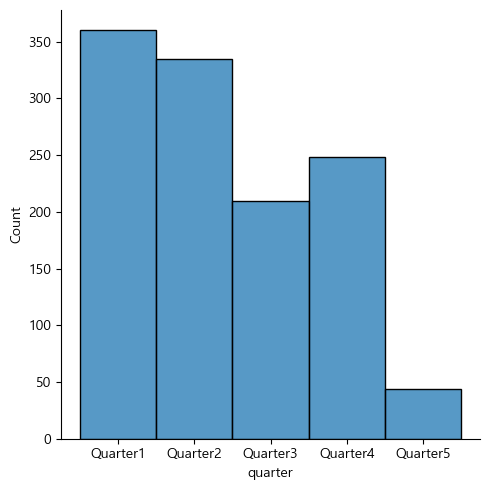

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [60]:
sns.displot(train['quarter'])
plt.show()

train['quarter'].value_counts()     # 한 달을 4개의 기간으로 분할한 단위 (예시: 1주차, 2주차, 3주차 ..)

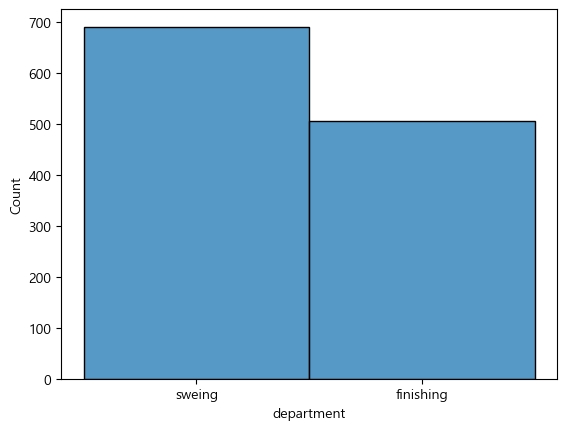

sweing       691
finishing    506
Name: department, dtype: int64

In [59]:
sns.histplot(train['department'])
plt.show()
train['department'].value_counts()   # 인스턴스 관련 부서

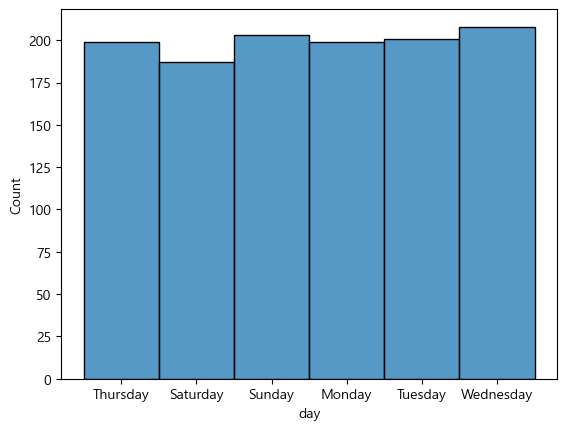

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [61]:
sns.histplot(train['day'])
plt.show()
train['day'].value_counts()     # 요일

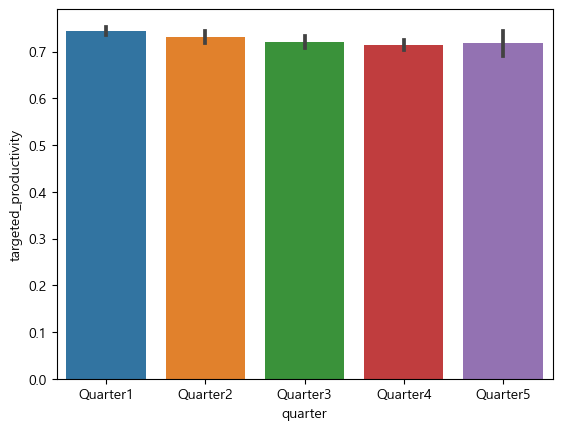

In [106]:
sns.barplot(train['quarter'], train['targeted_productivity'])
plt.show()

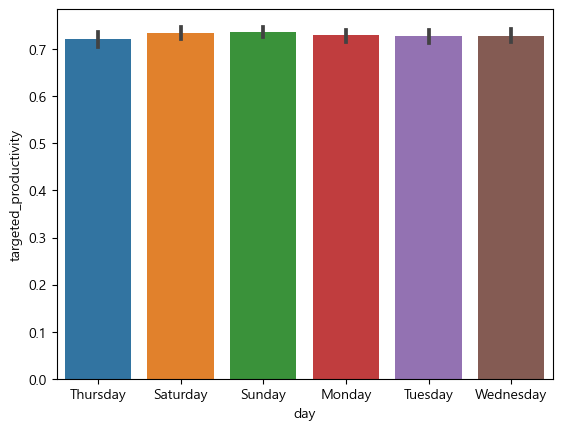

In [104]:
sns.barplot(train['day'], train['targeted_productivity'])
plt.show()

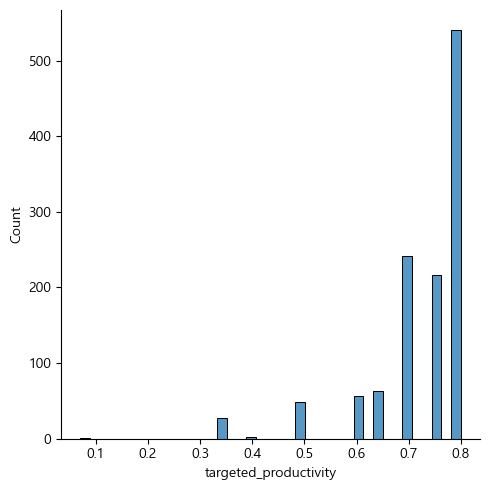

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

In [65]:
sns.displot(train['targeted_productivity'])
plt.show()
train['targeted_productivity'].value_counts()       # 설정한 목표 생산성

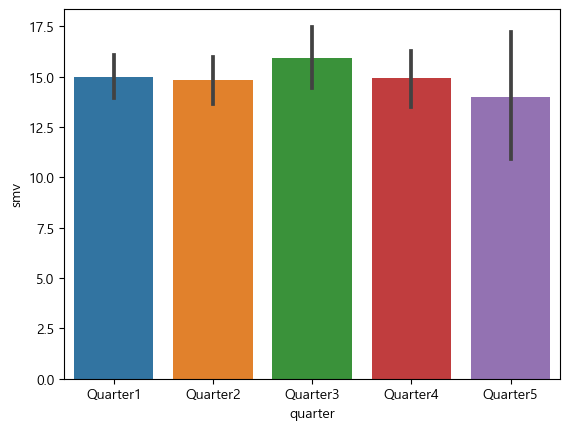

In [101]:
sns.barplot(train['quarter'], train['smv'])
plt.show()

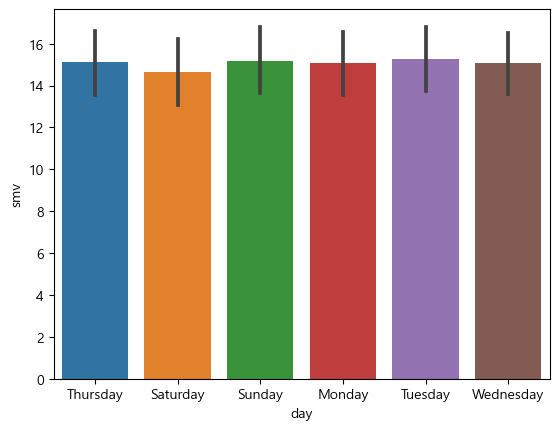

In [102]:
sns.barplot(train['day'], train['smv'])
plt.show()

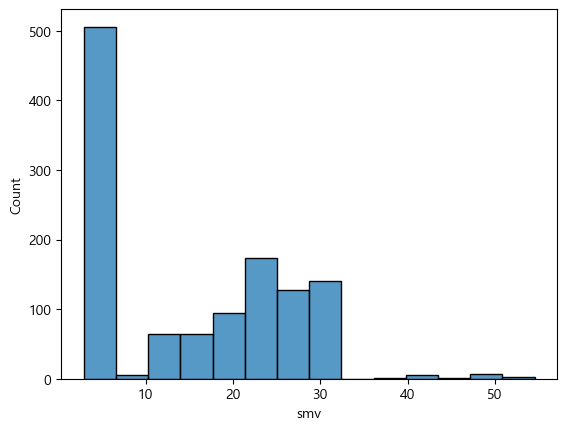

3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: smv, Length: 70, dtype: int64

In [66]:
sns.histplot(train['smv'])
plt.show()
train['smv'].value_counts()     # 작업에 할당된 시간 (분)

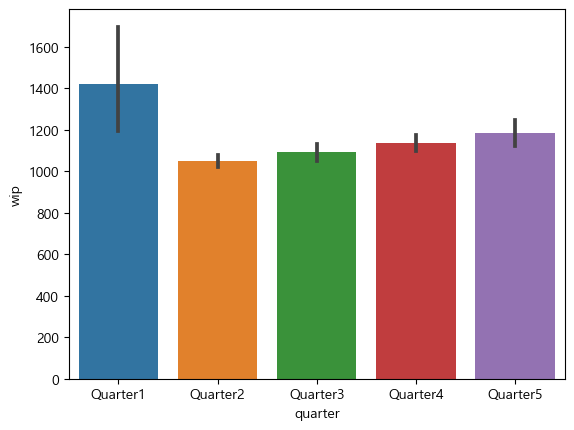

In [99]:
sns.barplot(train['quarter'], train['wip'])
plt.show()

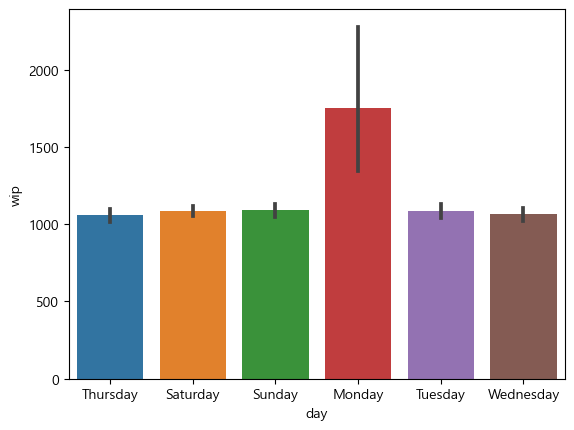

In [100]:
sns.barplot(train['day'], train['wip'])
plt.show()

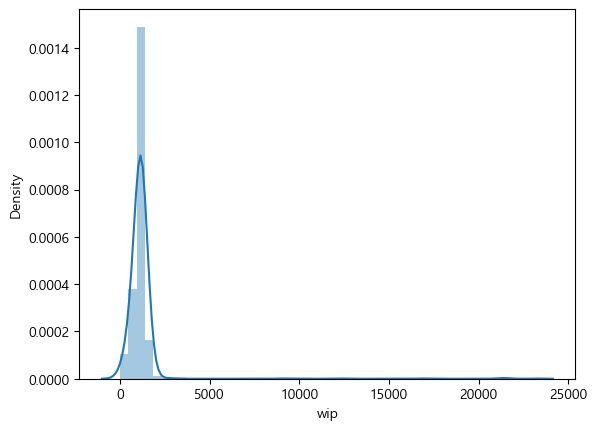

1190    506
1039      5
1282      4
1422      3
1216      3
       ... 
1635      1
1519      1
1337      1
1118      1
914       1
Name: wip, Length: 549, dtype: int64

In [68]:
sns.distplot(train['wip'])
plt.show()
train['wip'].value_counts()     # 작업 진행 중인 품목 수 (제품에 대한 미완성 품목 수 포함)

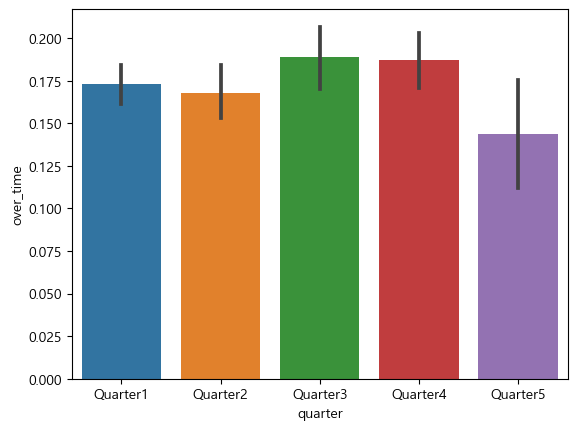

In [97]:
sns.barplot(train['quarter'], train['over_time'])
plt.show()

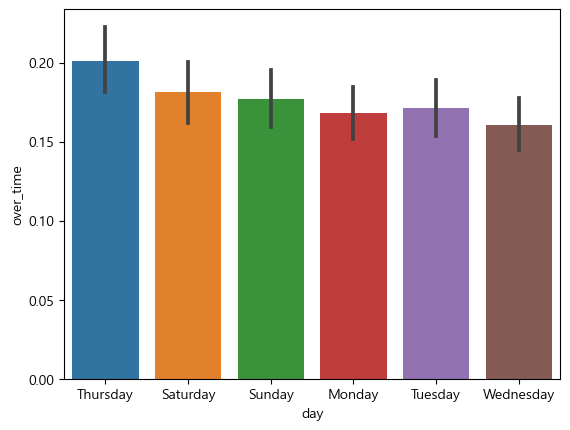

In [98]:
sns.barplot(train['day'], train['over_time'])
plt.show()

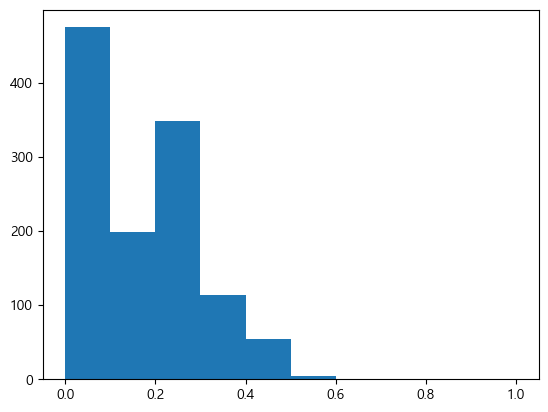

0.03704    129
0.05556    111
0.26852     61
0.26389     48
0.04630     39
          ... 
0.15972      1
0.46991      1
0.41551      1
0.46296      1
0.12037      1
Name: over_time, Length: 143, dtype: int64

In [69]:
plt.hist(train['over_time'])
plt.show()
train['over_time'].value_counts()       # 각 팀별 초과 근무 정도 (0~1)

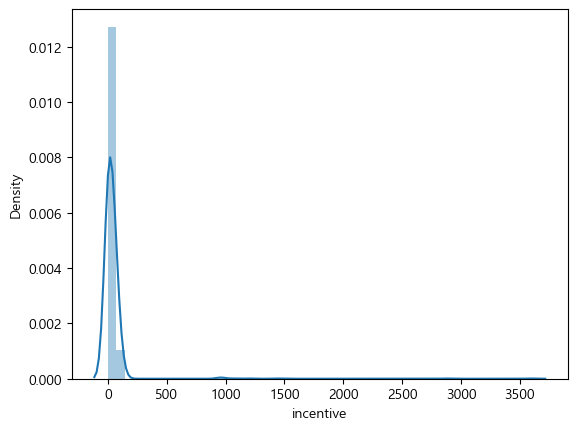

In [76]:
sns.distplot(train['incentive'])
plt.show()

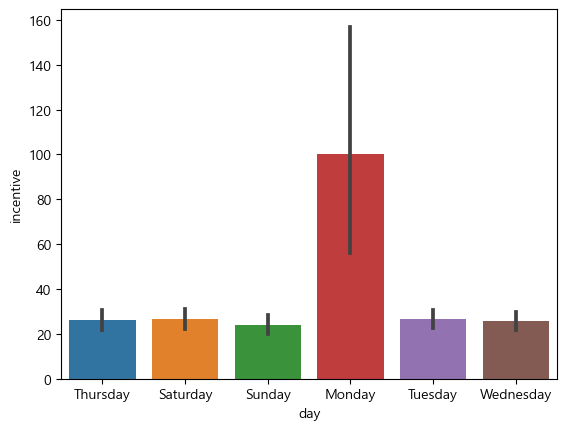

In [79]:
sns.barplot(train['day'], train['incentive'])
plt.show()

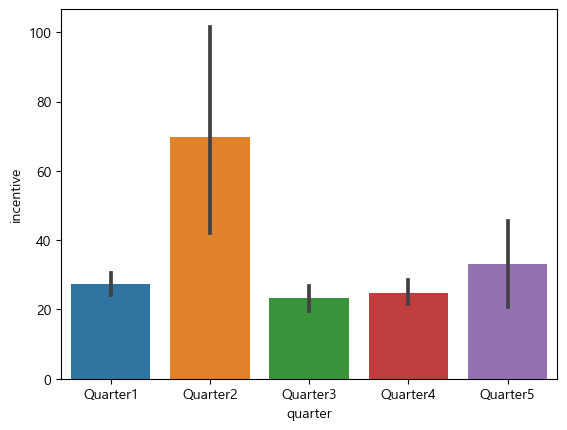

0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: incentive, dtype: int64

In [73]:
sns.barplot(train['quarter'], train['incentive'])    # 평균?
plt.show()
train['incentive'].value_counts()       # 재정적 인센티브 양 (BDT 단위)

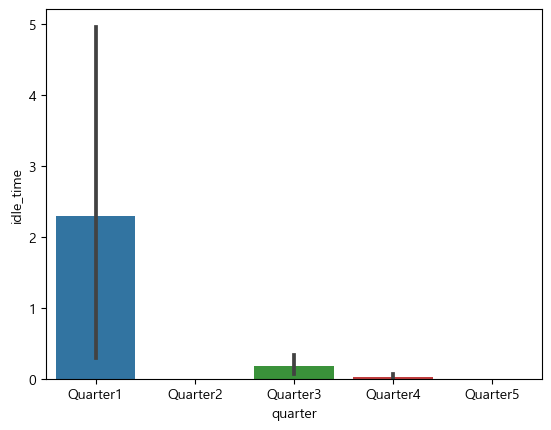

In [95]:
sns.barplot(train['quarter'], train['idle_time'])
plt.show()

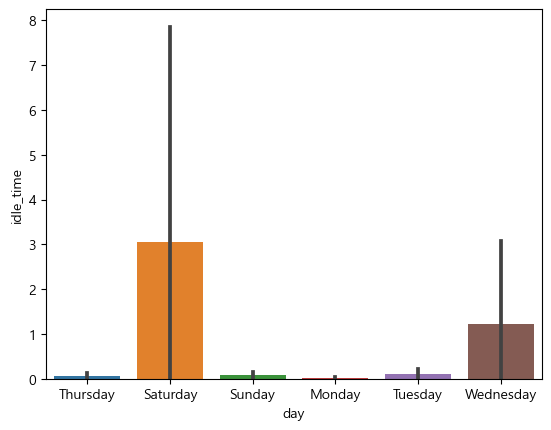

In [96]:
sns.barplot(train['day'], train['idle_time'])
plt.show()

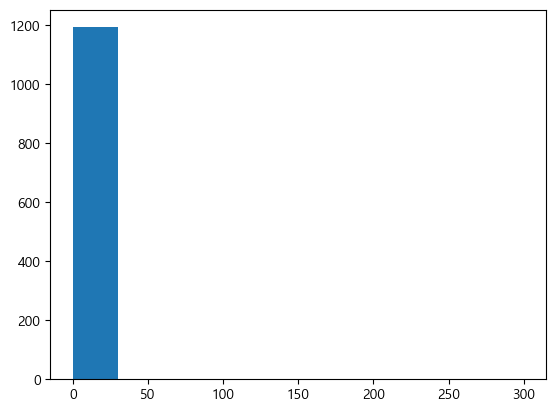

0      1179
4         4
3         3
2         2
5         2
8         2
90        1
150       1
270       1
300       1
6         1
Name: idle_time, dtype: int64

In [78]:
plt.hist(train['idle_time'])
plt.show()
train['idle_time'].value_counts()       # 생산이 중단된 시간

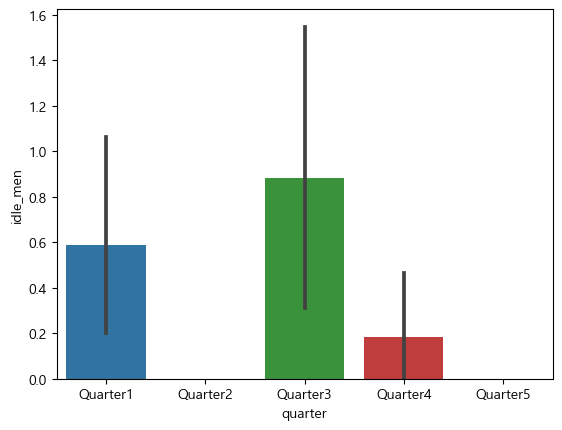

In [87]:
sns.barplot(train['quarter'], train['idle_men'])

plt.show()

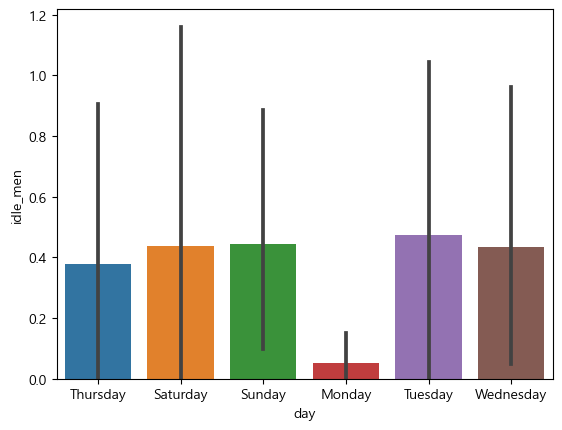

In [88]:
sns.barplot(train['day'], train['idle_men'])
plt.show()

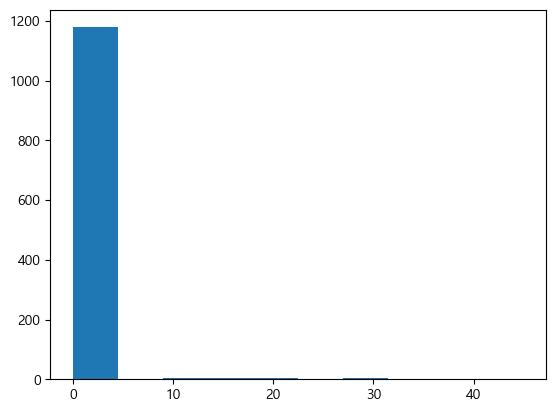

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

In [80]:
plt.hist(train['idle_men'])
plt.show()
train['idle_men'].value_counts()        # 생산 중단으로 유휴인원 수

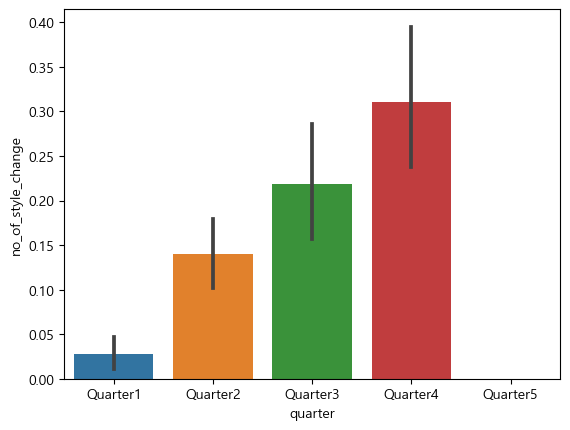

In [93]:
sns.barplot(train['quarter'], train['no_of_style_change'])
plt.show()

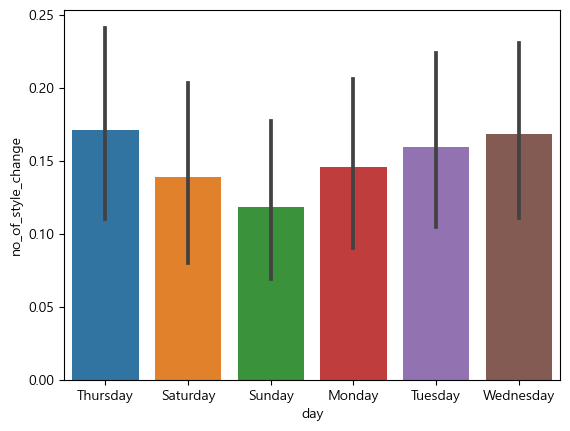

In [94]:
sns.barplot(train['day'], train['no_of_style_change'])
plt.show()

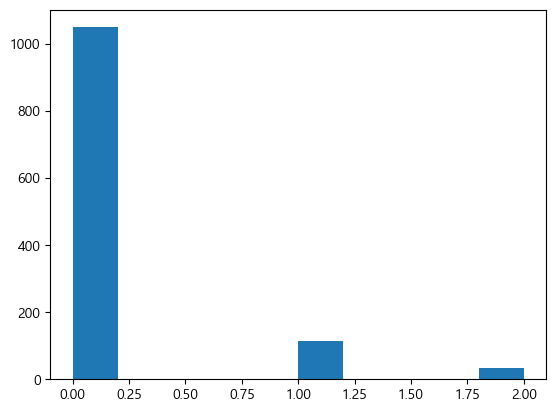

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

In [89]:
plt.hist(train['no_of_style_change'])
plt.show()
train['no_of_style_change'].value_counts()      # 특정 제품의 스타일 변경 횟수

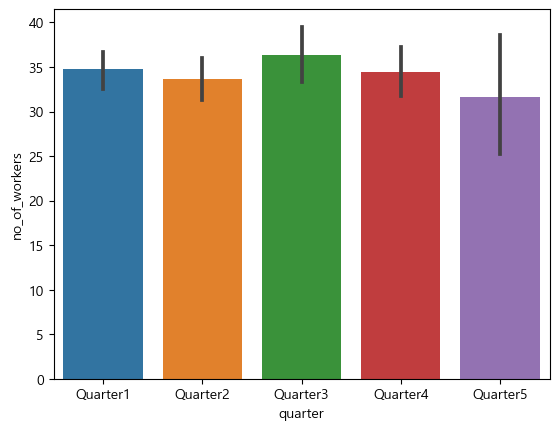

In [91]:
sns.barplot(train['quarter'], train['no_of_workers'])
plt.show()

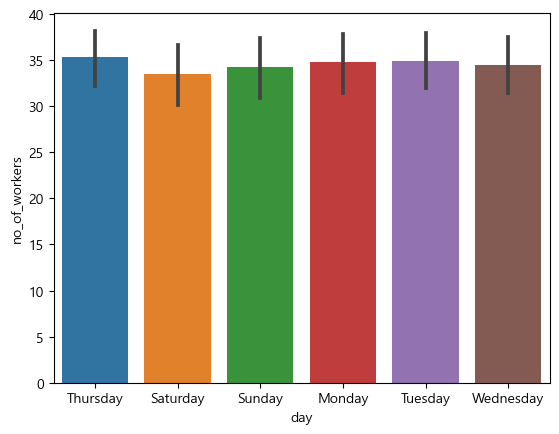

In [92]:
sns.barplot(train['day'], train['no_of_workers'])
plt.show()

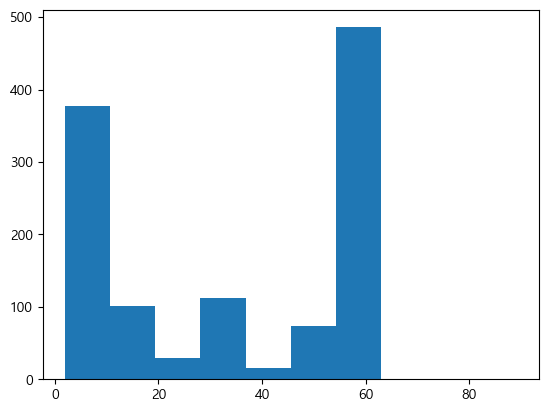

8     262
58    135
57    134
56    103
59     80
10     60
34     43
9      42
12     37
15     37
55     27
33     24
52     22
31     21
54     19
20     16
18     16
50     10
53      9
51      9
30      9
32      8
60      7
25      6
2       6
35      6
45      6
19      4
38      4
5       3
17      3
7       3
14      2
46      2
39      2
42      2
22      2
27      2
49      1
24      1
48      1
47      1
28      1
44      1
26      1
11      1
21      1
4       1
89      1
16      1
29      1
6       1
Name: no_of_workers, dtype: int64

In [90]:
plt.hist(train['no_of_workers'])
plt.show()
train['no_of_workers'].value_counts()       # 팀별 작업자 수